# Context

The dataset is covering a bank that is trying to attract more customers to invest in their bank. The bank is
planning to create a classification model to predict which customers have a higher possibility to apply for and
getting accepted for a personal loan. 

# Objective

* To predict which customers will apply for a personal loan.
* Which features are the most important in model building. 

# Data Description

1. ID: Customer ID
2. Age: Customer’s age in completed years
3. Experience: #years of professional experience
4. Income: Annual income of the customer (in thousand dollars)
5. ZIP Code: Home Address ZIP code.
6. Family: the Family size of the customer
7. CCAvg: Average spending on credit cards per month (in thousand dollars)
8. Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
9. Mortgage: Value of house mortgage if any. (in thousand dollars)
10. Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
11. Securities_Account: Does the customer have securities account with the bank?
12. CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
13. Online: Do customers use internet banking facilities?
14. CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

# Importing Needed Libraries

In [ ]:
# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, roc_auc_score

# Loading Data

In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the data
loan = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Loan_dataset.csv')

In [ ]:
# copying data to another varaible to avoid any changes to original data
data = loan.copy()

# Exploring the Data (EDA)

In [ ]:
# Viewing first 5 rows of the dataset
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
# Viewing last 5 rows of the dataset
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [ ]:
#Getting the shape of the dataset
data.shape

(5000, 14)

Observation:

The dataset has 14 columns and 5000 rows

In [ ]:
#Printing the columns 
print(data.columns)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')


In [ ]:
#Checking for duplicate records
data[data.duplicated()].count()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

There are no duplicate records in this dataset 

In [ ]:
#Printing the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Observation:


* Most of the data types are int64 and CCAvg is the only float64 type
* Target variable personal loan is integer type


In [ ]:
#Checking the dataset for missing values
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

Observation:

* There are no missing values in the dataset.

In [ ]:
#Getting the summary of the numerical varaibles
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0



*   The average age of a customer is 45 years old
*   I believe zip code even though its an interger well in terms of the table above there is no relevance in terms of mean, std, min, 25%, 50%, 75%, and max.
*  The average credit card spending is around $1,900. 
*  I believe the ID column is not necessary.
*  The average income is 74K. 






## Data Pre-processing

In [ ]:
#Droping irrelevant columns
data.drop(["ID"], axis=1, inplace=True)
data.drop(["ZIPCode"], axis=1, inplace=True)


In [ ]:
#Printing the data info and making sure the ID column is dropped 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal_Loan       5000 non-null   int64  
 8   Securities_Account  5000 non-null   int64  
 9   CD_Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


# EDA

## Univariate Analysis

In [ ]:
# This function takes the numerical column as the input and returns the
# boxplots and histograms for the variable.


def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="green"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        feature.mean(), color="red", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="black", linestyle="-"
    )  # Add median to the histogram

Following the order of data.info () we start with:
### Age


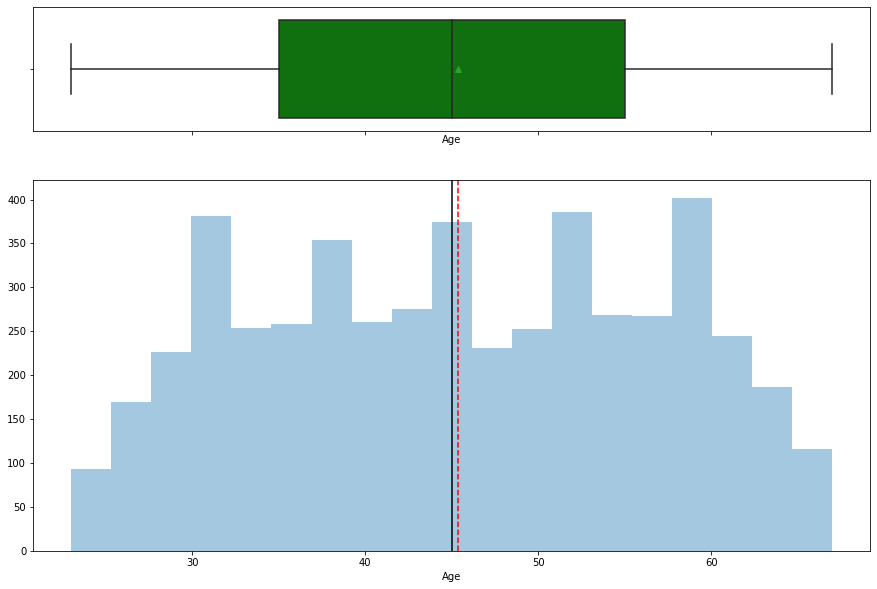

In [ ]:
histogram_boxplot(data["Age"])

Observation: 

* We can see that Age has a relatively normal distribution.
* There are no outliers in this variable.

### Experience

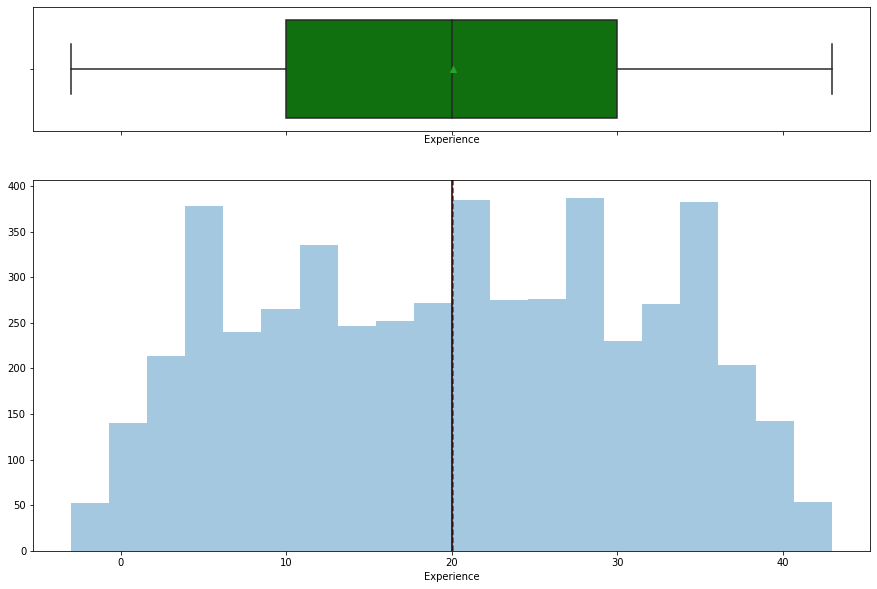

In [ ]:
histogram_boxplot(data["Experience"])

Observation: 

* We can see that Experience has a normal distribution with both mean and median at 20.
* There are no outliers in this variable.

### Income

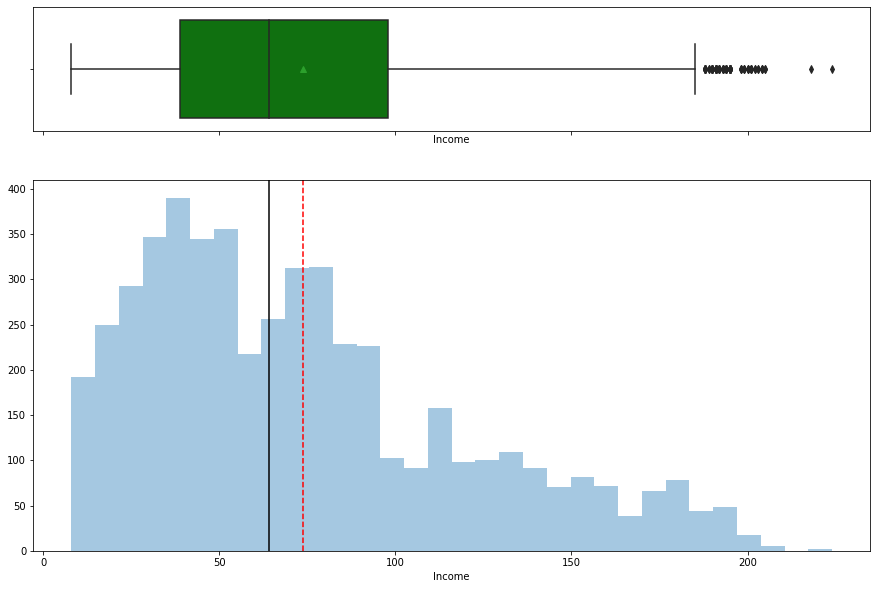

In [ ]:
histogram_boxplot(data["Income"])

Observation: 

* We can see that Income is right skewed with an average of 70K. 
* There are some outliers in this variable.

In [ ]:
# Bar plot is more effective in visualizing categorical data 
def perc_on_bar(plot, feature):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=12)  # annotate the percantage
    plt.show()  # show the plot

### Family

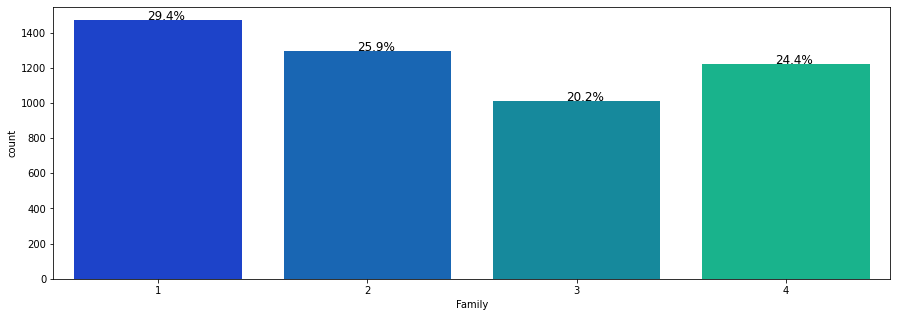

In [ ]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["Family"], palette="winter")
perc_on_bar(ax, data["Family"])

Observation:

Most Families in the data set have 1 or 2 members.
 

CCAvg

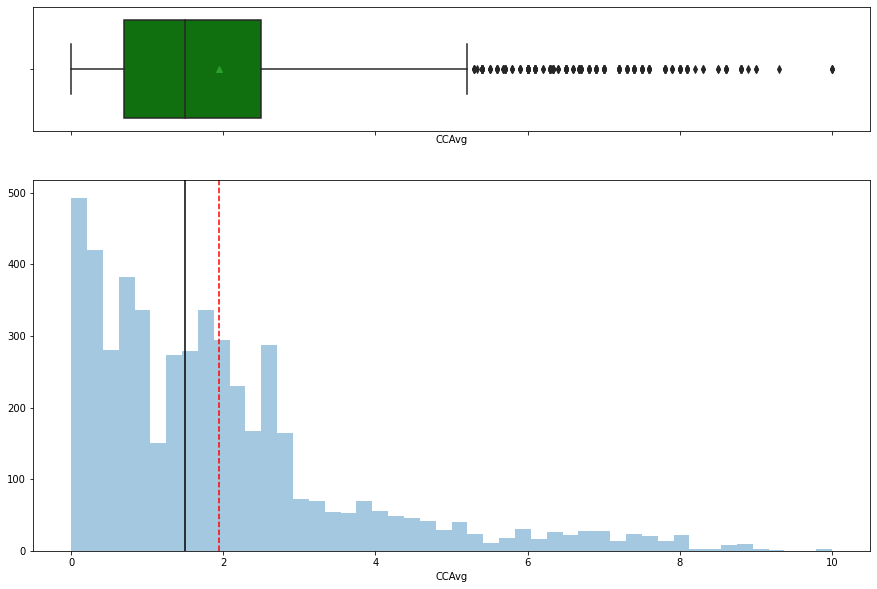

In [ ]:
histogram_boxplot(data["CCAvg"])

Observation:

* CCAvg is right skewed.
* Average credit card speding is around $1900. 
* There are outliers in this variable.


Education

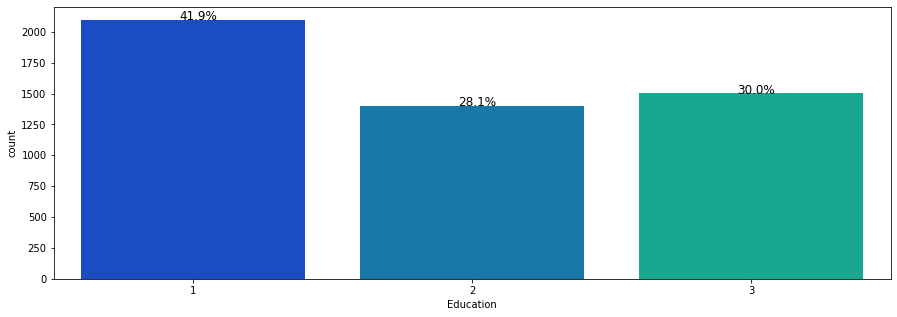

In [ ]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["Education"], palette="winter")
perc_on_bar(ax, data["Education"])


Observation:

* Most values for education are at 1 which means most customers have an undergrad degree followed by 3 advanced/professional degrees. 
* This variable does not have any outliers.

### Mortgage

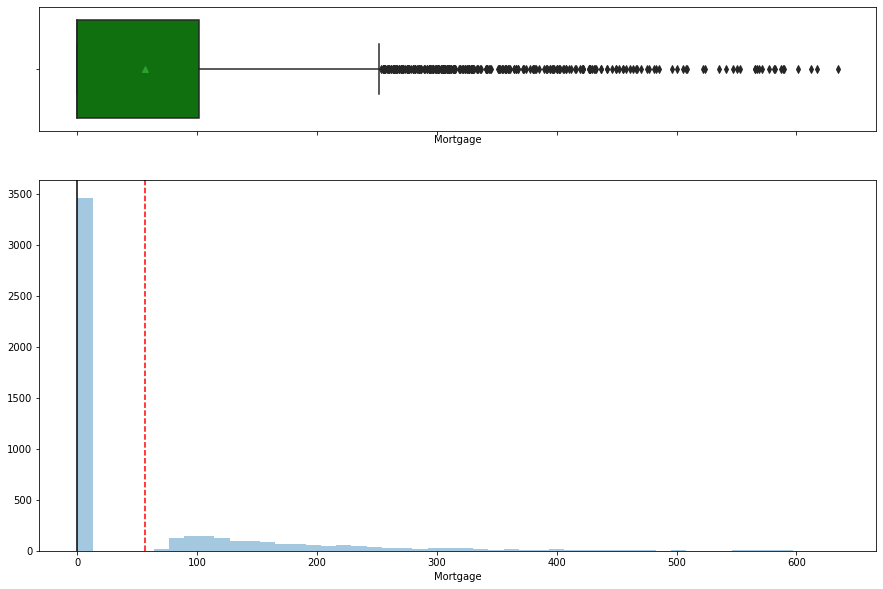

In [ ]:
histogram_boxplot(data["Mortgage"])

Observation:

* Almost 70% of values for Mortgage is at $0 which makes this right skewed. So we can deduce that most customers are renters or have paid off their mortgage. 
* This variable has a significant number of outliers.

### Personal_Loan

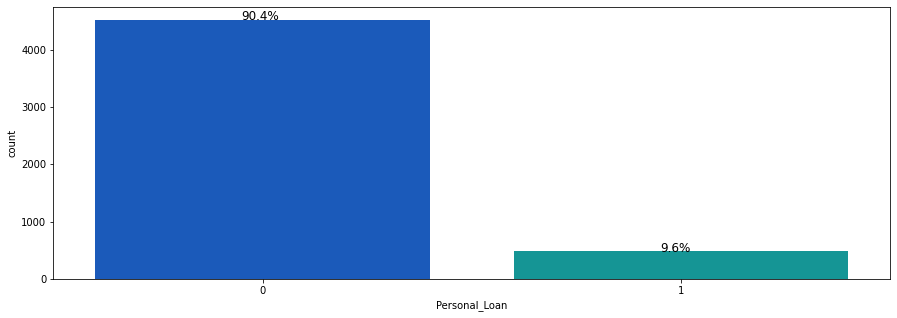

In [ ]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["Personal_Loan"], palette="winter")
perc_on_bar(ax, data["Personal_Loan"])

Observation:

* Around 90% of the customers in the data set did not accept a personal loan in the previous campaign. 

### Securities_Account

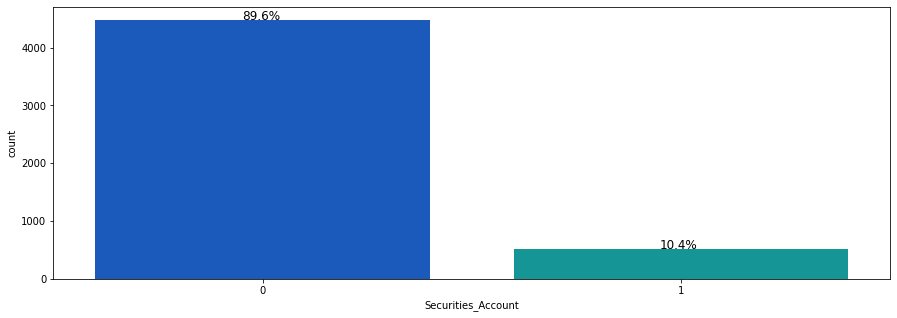

In [ ]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["Securities_Account"], palette="winter")
perc_on_bar(ax, data["Securities_Account"])

Observation:

* Vast majority of customers in the data set do not have a security account.

### CD_Account

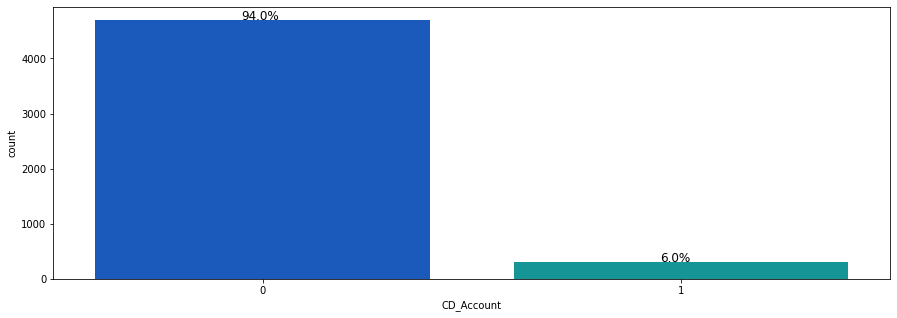

In [ ]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["CD_Account"], palette="winter")
perc_on_bar(ax, data["CD_Account"])

Observation:

* Most of the customers in the data set do not have CD account.

### Online

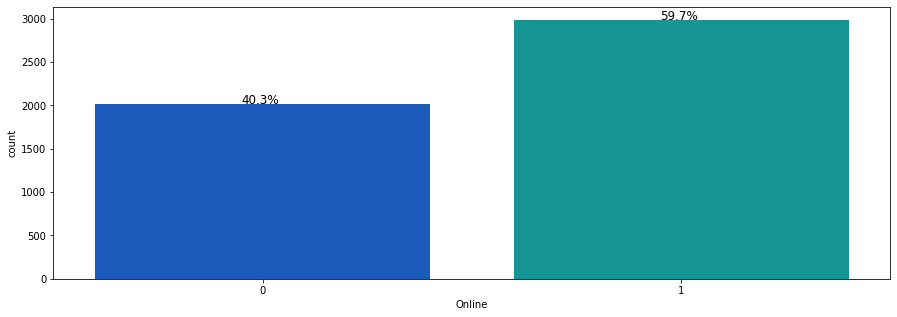

In [ ]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["Online"], palette="winter")
perc_on_bar(ax, data["Online"])

Observation:

* Most customers in the data set utilize online banking.

CreditCard

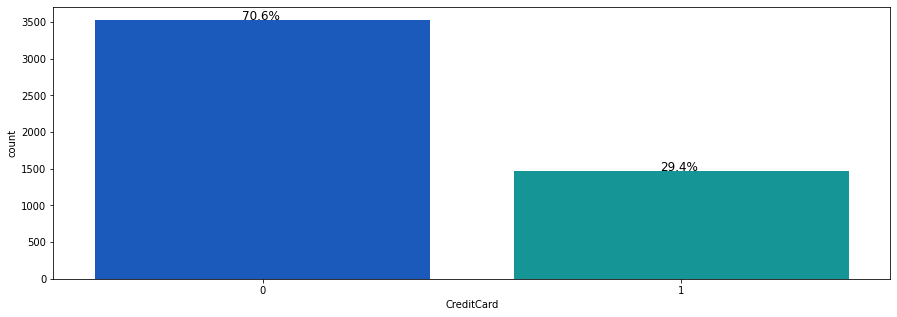

In [ ]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(data["CreditCard"], palette="winter")
perc_on_bar(ax, data["CreditCard"])

Observation:

* Most customers in the data set do not use any other credit cards.

## Bivariate analysis

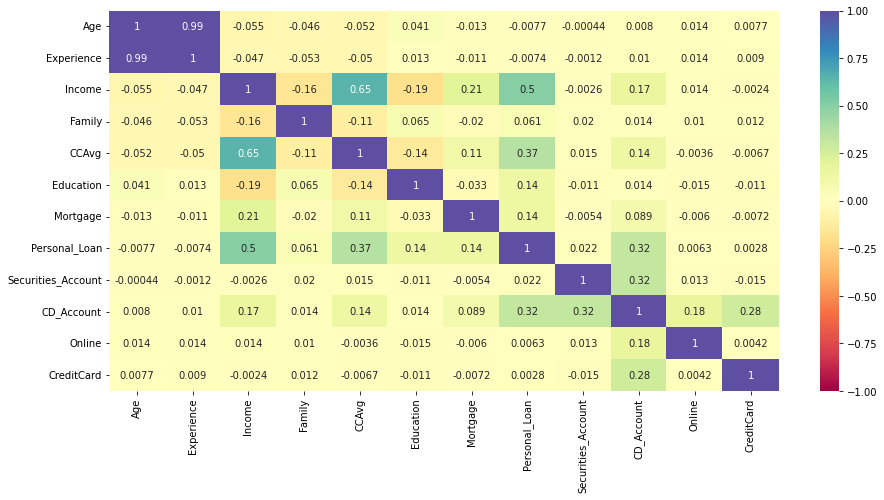

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

Observation:
* Since our Target variable is personal loan, we can see that the highest correlated variables are: Income(0.5), CCavg(0.37) and CD_account(0.32).
* CCavg is highly correlated with income at 0.65 
* CD_account is highly correlated with personal loan and securities account.

Let's compare in order from the correlation plot above 
### Personal Loan vs Age, Experience, Income, Family,CCAvg, Education, Mortgage, Securities account, CD account, online and credit card

I removed the outliers for better observation

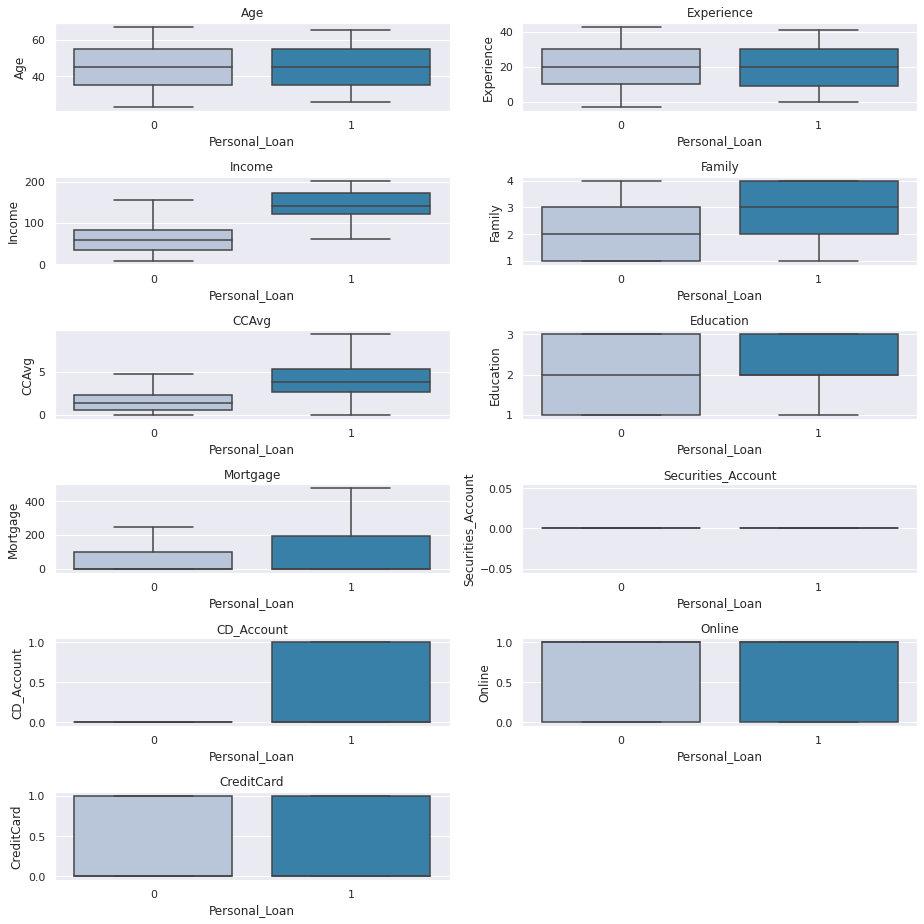

In [ ]:
cols = data[
    [
        "Age",
        "Experience",
        "Income",
        "Family",
        "CCAvg",
        "Education",
        "Mortgage",
        "Securities_Account",
        "CD_Account",
        "Online",
        "CreditCard"
    ]
].columns.tolist()
plt.figure(figsize=(13, 13))

for i, variable in enumerate(cols):
    plt.subplot(6, 2, i + 1)
    sns.boxplot(data["Personal_Loan"], data[variable], palette="PuBu", showfliers=False)
    plt.tight_layout()
    plt.title(variable)
plt.show()

### Observation:
* We can see that age, experience, securities account and education do not contribute as much to customers applying for a personal loan
* We can also see that customers with higher income and higher credit card spending average do contribute the application of customers for a personal loan 
* Furthermore, we can see that having a mortage and a CD account do contribute the application of customers for a personal loan.  

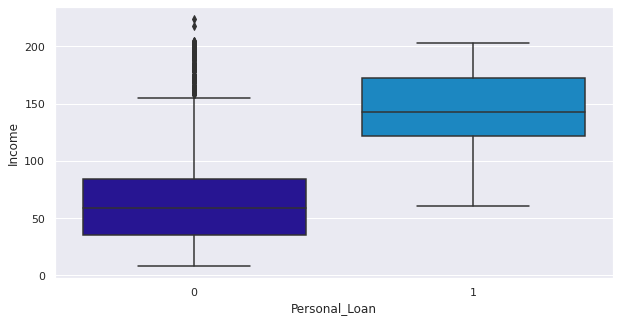

In [ ]:
# Looking at Personal loan vs income in more detail
plt.figure(figsize=(10, 5))
sns.boxplot(data["Personal_Loan"], data["Income"])
plt.show()

Observation: Customers with higher income apply for a personal loan.

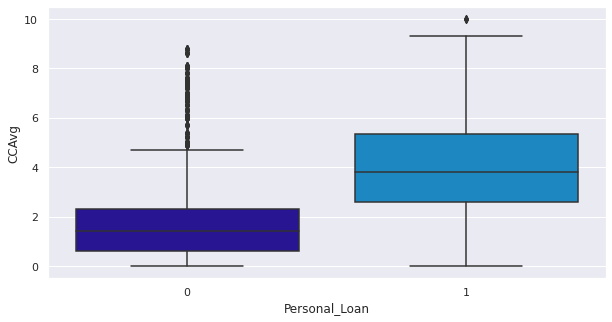

In [ ]:
# Looking at CCavg and personal loan in more detail
plt.figure(figsize=(10, 5))
sns.boxplot(data["Personal_Loan"], data["CCAvg"])
plt.show()

Observation: Customers with higher credit card spending average apply for a personal loan.

Created stacked plots for all my categorical variables compared to my target variable - Personal_Loan

In [ ]:
def stacked_plot(x):
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, data["Personal_Loan"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, data["Personal_Loan"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Personal_Loan vs Family

Personal_Loan     0    1   All
Family                        
1              1365  107  1472
2              1190  106  1296
3               877  133  1010
4              1088  134  1222
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


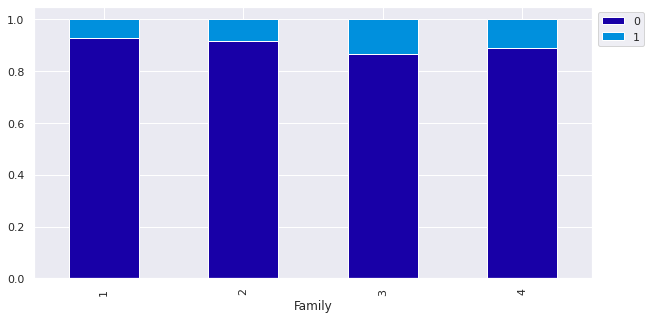

In [ ]:
stacked_plot(data["Family"])

Observation: Family size doesnt seem to make a difference, however family size of 3 and 4 apply a personal loan the most.

Personal_Loan vs Education

Personal_Loan     0    1   All
Education                     
1              2003   93  2096
2              1221  182  1403
3              1296  205  1501
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


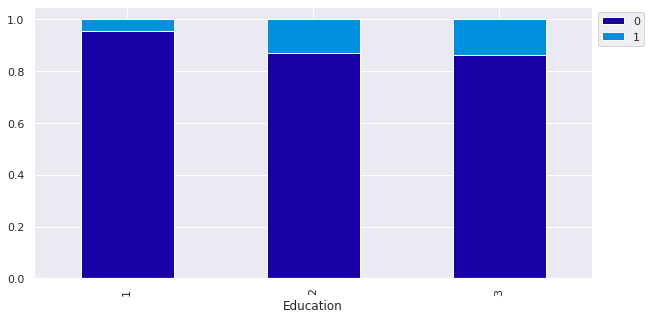

In [ ]:
stacked_plot(data["Education"])

Observation: Education doesnt seem to make a difference, however most advanced degree customers did apply for a personal loan. 

Personal_Loan vs Securities_Account

Personal_Loan          0    1   All
Securities_Account                 
0                   4058  420  4478
1                    462   60   522
All                 4520  480  5000
------------------------------------------------------------------------------------------------------------------------


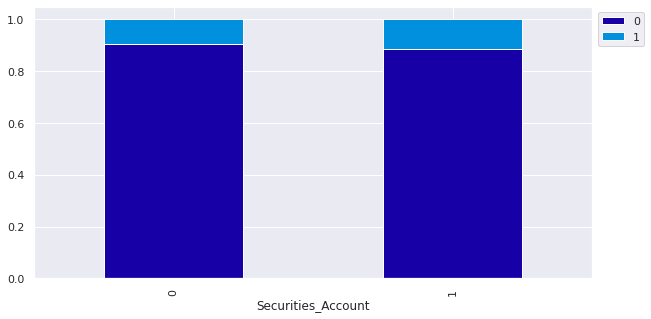

In [ ]:
stacked_plot(data["Securities_Account"])

Observation: Having a securites account doesnt seem to make a difference, however most customers applying for a personal loan did not have a securities account. 

Personal_Loan vs CD_Account

Personal_Loan     0    1   All
CD_Account                    
0              4358  340  4698
1               162  140   302
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


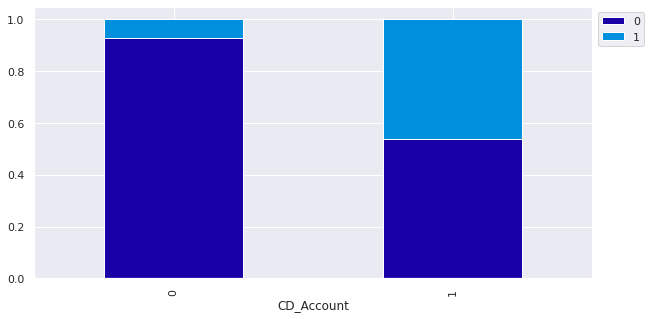

In [ ]:
stacked_plot(data["CD_Account"])

Observation: Most customers applying for a personal loan did not have a CD account.

Personal_Loan vs Online

Personal_Loan     0    1   All
Online                        
0              1827  189  2016
1              2693  291  2984
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


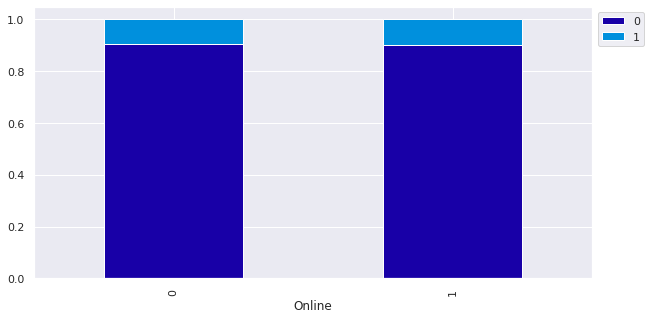

In [ ]:
stacked_plot(data["Online"])

Observation: Most customers do utilize online banking.

Personal_Loan vs CreditCard

Personal_Loan     0    1   All
CreditCard                    
0              3193  337  3530
1              1327  143  1470
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


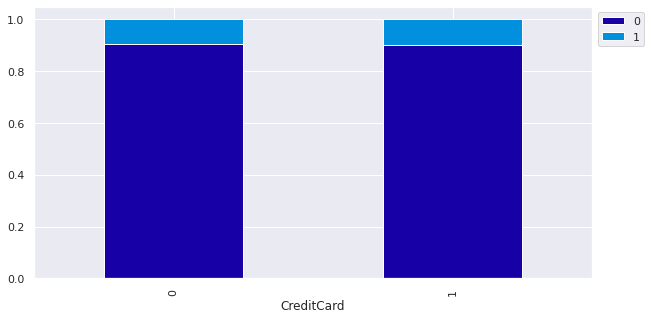

In [ ]:
stacked_plot(data["CreditCard"])

Observation: Most customers do not use other credit cards.

# Model Building

In [ ]:
column_names = list(data.columns)
column_names.remove(
    "Personal_Loan"
)  # Keep only names of features by removing the name of target variable
feature_names = column_names
print(feature_names)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']


## Data Splitting

In [ ]:
X = data.drop("Personal_Loan", axis=1)  # Features
y = data["Personal_Loan"]  # Labels (Target Variable)

In [ ]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(3500, 11) (1500, 11)


## Building Model # 1 (without any hyperparameters)

In [ ]:
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.10, 1: 0.90}, random_state=1
)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, random_state=1)

In [ ]:
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth  
    
    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

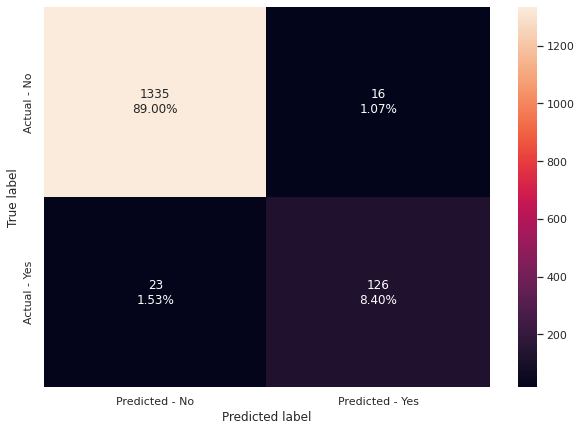

In [ ]:
make_confusion_matrix(model, y_test)

In [ ]:
y_train.value_counts(1)

0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64

Observation: Y Training fairly reflects the dataset as a whole.

In [ ]:
##  Function to calculate recall score
def get_recall_score(model):
    """
    model : classifier to predict values of X

    """
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
    print("Recall on test set : ", metrics.recall_score(y_test, pred_test))

In [ ]:
get_recall_score(model)

Recall on training set :  1.0
Recall on test set :  0.8456375838926175


Observation: 
* The recall on the test set is poor. Plus the training set recall score of 1 is a symptom of overfitting. 

## Visualizing the Decision Tree

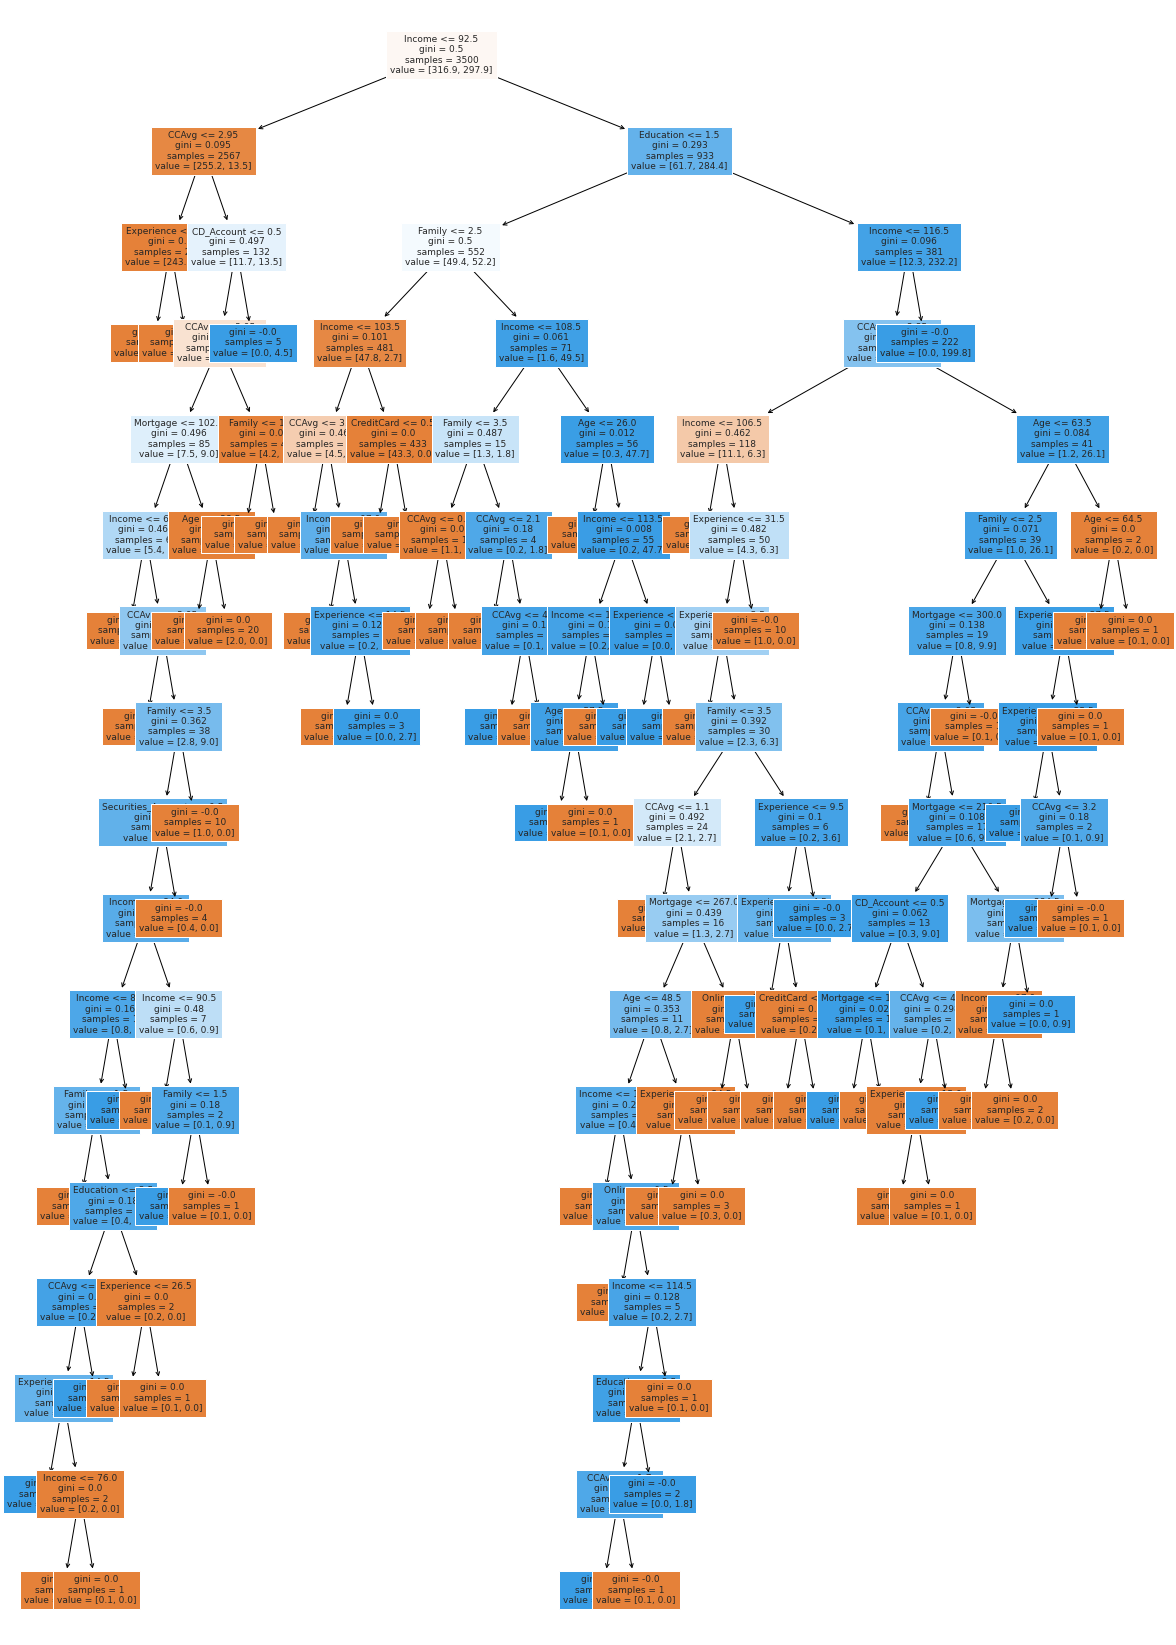

In [ ]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- Experience <= -2.50
|   |   |   |--- weights: [0.20, 0.00] class: 0
|   |   |--- Experience >  -2.50
|   |   |   |--- weights: [243.30, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Mortgage <= 102.50
|   |   |   |   |   |--- Income <= 68.50
|   |   |   |   |   |   |--- weights: [1.50, 0.00] class: 0
|   |   |   |   |   |--- Income >  68.50
|   |   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |   |--- weights: [1.10, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  3.05
|   |   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |   |--- Securities_Account <= 0.50
|   |   |   |   |   |   |   |   |   |--- Income <= 84.00
|   |   |   |   |   |   |   |   |   |   |--- Income <= 82.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- Income >  82.50
|   | 

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                             Imp
Income              6.333427e-01
Family              1.511506e-01
CCAvg               9.176876e-02
Education           8.997289e-02
Experience          9.883575e-03
Mortgage            9.357354e-03
CD_Account          7.872231e-03
Age                 4.227631e-03
Securities_Account  1.878577e-03
Online              5.456943e-04
CreditCard          2.977765e-16


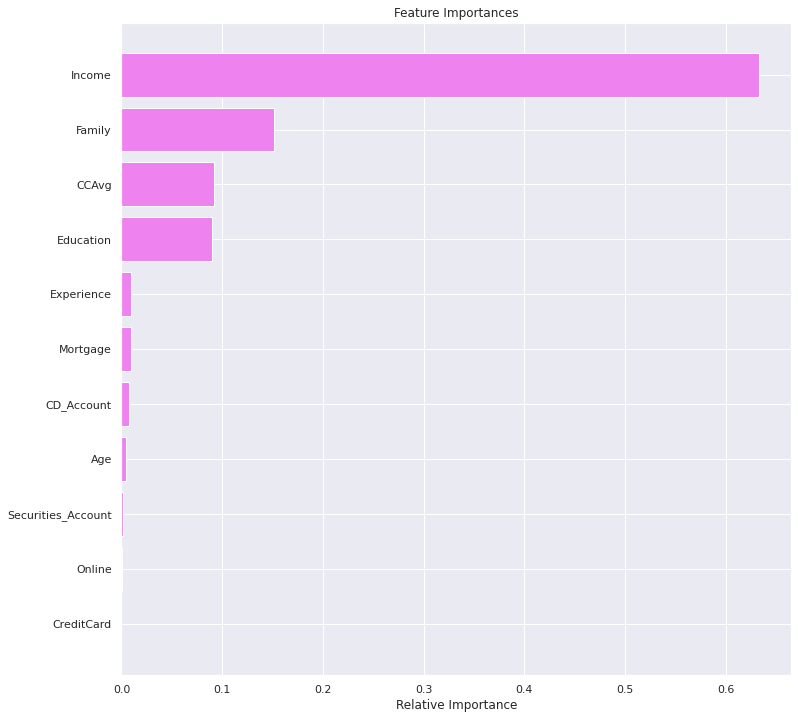

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observation: After running model 1, we can determine that income, family size, CCavg, and education are the most important features. 

## Building Model # 2 (using hyperparameters to reducing overfitting)





In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.10, 1: 0.90})

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(1, 10),
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
    "max_features": ["log2", "sqrt"],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, criterion='entropy',
                       max_depth=3, max_features='log2',
                       min_impurity_decrease=1e-06, random_state=1)

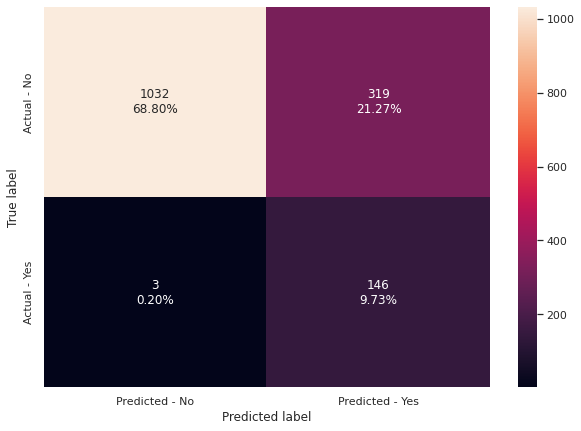

In [ ]:
make_confusion_matrix(estimator, y_test)

In [ ]:
get_recall_score(estimator)

Recall on training set :  1.0
Recall on test set :  0.9798657718120806


Observation: Oveerfitting when the metric on the training data is much greater than the metric on the test data, also a training metric of 1 is a symptom of overfitting. In the previous example we had a training recall of 1 and a test recall of 0.84. The fact that we have 1 on the training recall and a much  lower score for the test means that the model suffered from overfitting. Now this model also has 1 for the traning recall however the test recall is very close at 0.98 to the training recall. I consider this to be a good model.

## Visualizing the Decision Tree

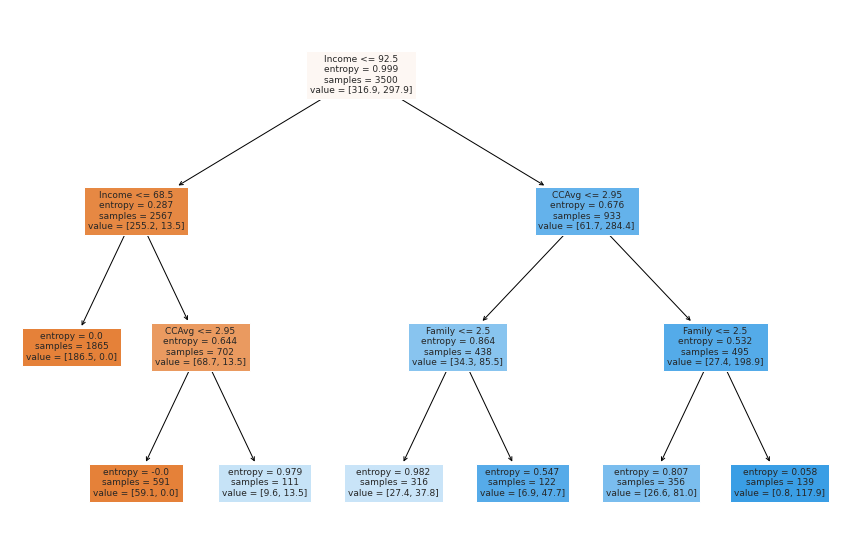

In [ ]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- Income <= 68.50
|   |   |--- weights: [186.50, 0.00] class: 0
|   |--- Income >  68.50
|   |   |--- CCAvg <= 2.95
|   |   |   |--- weights: [59.10, 0.00] class: 0
|   |   |--- CCAvg >  2.95
|   |   |   |--- weights: [9.60, 13.50] class: 1
|--- Income >  92.50
|   |--- CCAvg <= 2.95
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [27.40, 37.80] class: 1
|   |   |--- Family >  2.50
|   |   |   |--- weights: [6.90, 47.70] class: 1
|   |--- CCAvg >  2.95
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [26.60, 81.00] class: 1
|   |   |--- Family >  2.50
|   |   |   |--- weights: [0.80, 117.90] class: 1



In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                         Imp
Income              0.810009
CCAvg               0.100001
Family              0.089990
Age                 0.000000
Experience          0.000000
Education           0.000000
Mortgage            0.000000
Securities_Account  0.000000
CD_Account          0.000000
Online              0.000000
CreditCard          0.000000


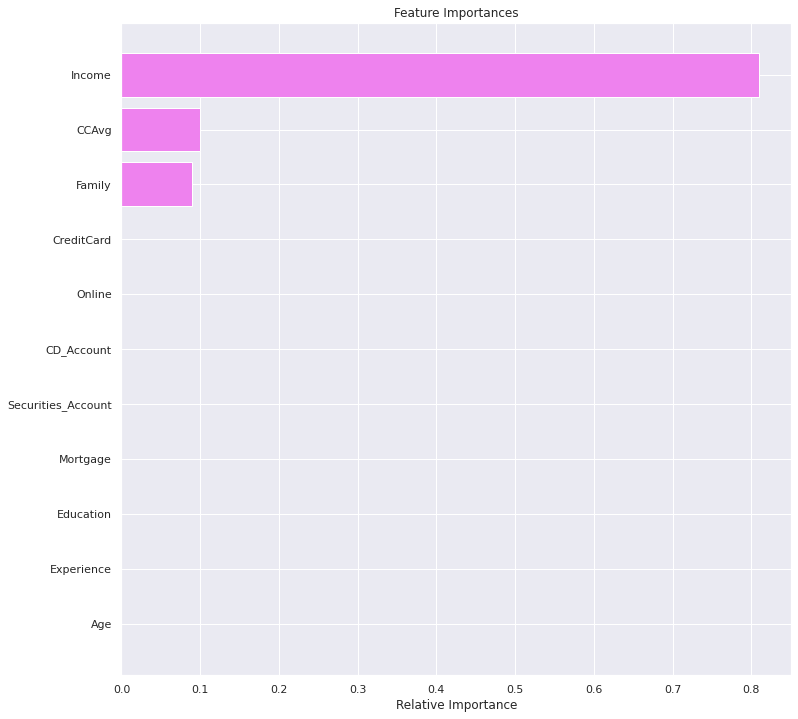

In [ ]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observation: After using hyperparameter tunning in our model, we can see that Income, CCavg and Family are the more important features.

## ## Building Model # 3 (using Cost Complexity Pruning)

In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.10, 1: 0.90})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-1.902693e-15
1,1.805828e-19,-1.902512e-15
2,1.805828e-19,-1.902331e-15
3,1.805828e-19,-1.902151e-15
4,3.792239e-19,-1.901772e-15
5,6.139815e-19,-1.901158e-15
6,1.083497e-18,-1.900074e-15
7,1.444662e-18,-1.898629e-15
8,3.575539e-18,-1.895054e-15
9,9.029140e-18,-1.886025e-15


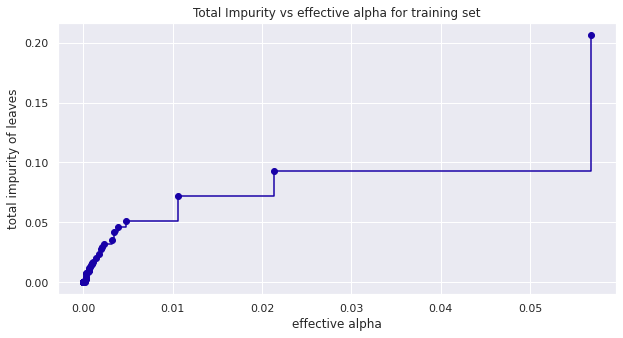

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.10, 1: 0.90}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.29287854019800386


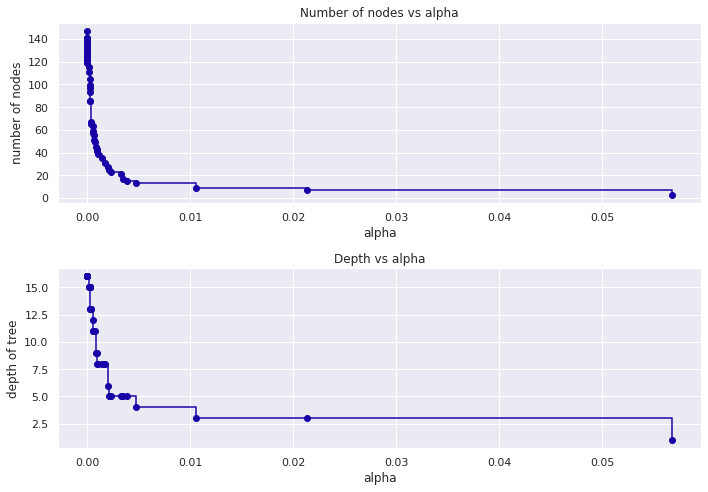

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
recall_train = []
for clf in clfs:
    pred_train3 = clf.predict(X_train)
    values_train = metrics.recall_score(y_train, pred_train3)
    recall_train.append(values_train)

In [ ]:
recall_test = []
for clf in clfs:
    pred_test3 = clf.predict(X_test)
    values_test = metrics.recall_score(y_test, pred_test3)
    recall_test.append(values_test)

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

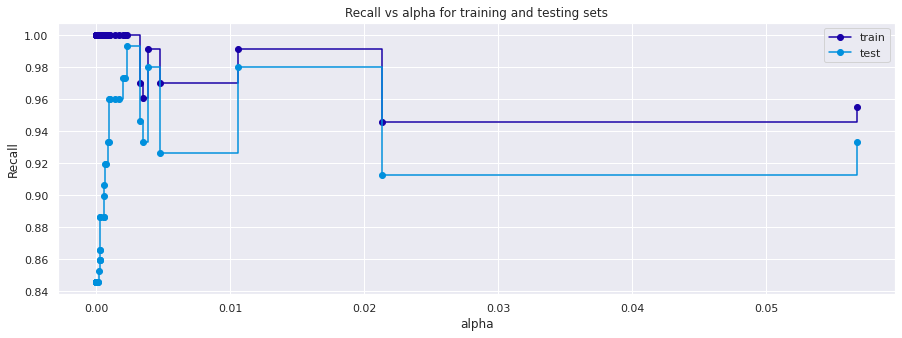

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Observation: We can see from the visualization above that we are trying to reduce Alpha and yet keep recall as close as possible from the train and test set.

In [ ]:
# let's modify the model and create a model that gives us the highest train and test recall
# we call this model the "best_model"
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.002328917016620179,
                       class_weight={0: 0.1, 1: 0.9}, random_state=1)


In [ ]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.002328917016620179,
                       class_weight={0: 0.1, 1: 0.9}, random_state=1)

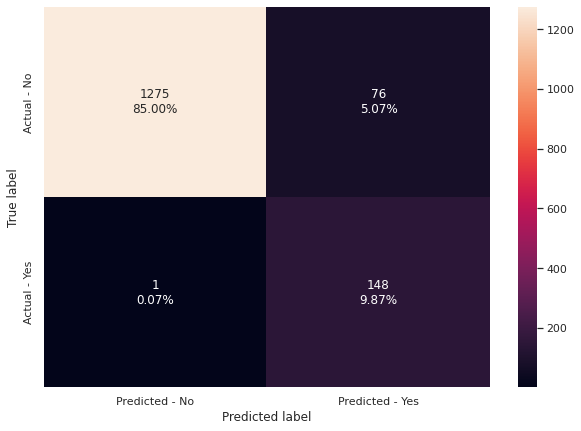

In [ ]:
make_confusion_matrix(best_model, y_test)

In [ ]:
get_recall_score(best_model)

Recall on training set :  1.0
Recall on test set :  0.9932885906040269



Observation: By prunning we avoided overfitting and improved our model and reduced our false positives to 5.07%.

## Visualizing the Decision Tree

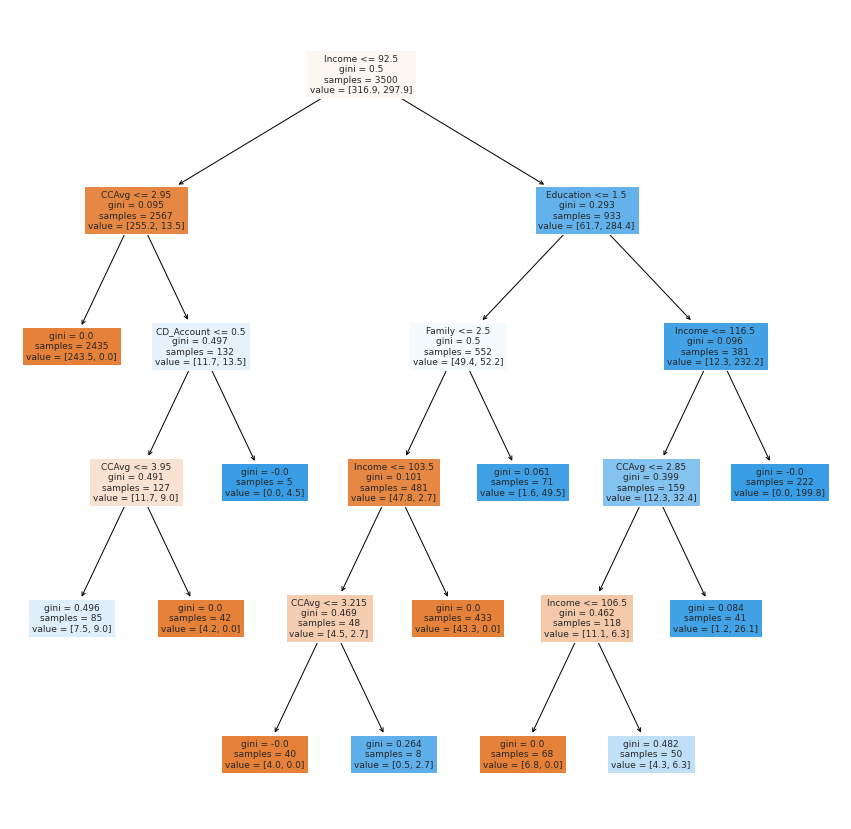

In [ ]:
plt.figure(figsize=(15, 15))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [243.50, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- weights: [7.50, 9.00] class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [4.20, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.00, 4.50] class: 1
|--- Income >  92.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- Income <= 103.50
|   |   |   |   |--- CCAvg <= 3.21
|   |   |   |   |   |--- weights: [4.00, 0.00] class: 0
|   |   |   |   |--- CCAvg >  3.21
|   |   |   |   |   |--- weights: [0.50, 2.70] class: 1
|   |   |   |--- Income >  103.50
|   |   |   |   |--- weights: [43.30, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [1.60, 49.50] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 116.50
|   |   |   |--- CCAvg <= 2.85
|   |   |   |   |--- Income <= 106.50
|   |   |   |   |   |--- we

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.661588
Family              0.147962
Education           0.094853
CCAvg               0.087384
CD_Account          0.008213
Age                 0.000000
Experience          0.000000
Mortgage            0.000000
Securities_Account  0.000000
Online              0.000000
CreditCard          0.000000


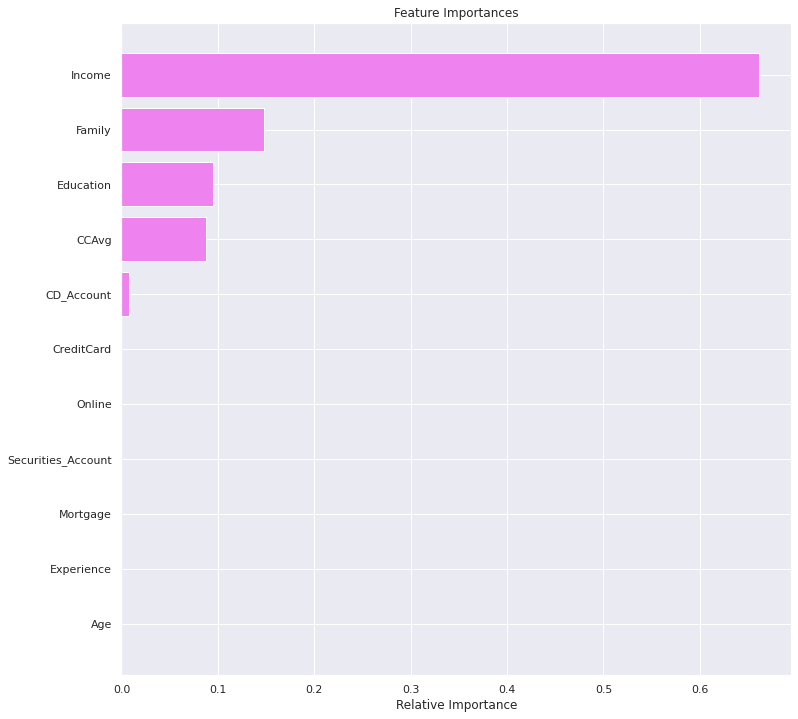

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observation: After prunning we see that the top feature importances are: income, family, education, and CCAvg.

## Comparing all the decision tree models

In [ ]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Initial decision tree model",
            "Decision tree with hyperparameter tuning",
            "Decision tree with post-pruning",
        ],
        "Train_Recall": [1, 1, 1],
        "Test_Recall": [0.85, 0.98, 0.99],
    }
)
comparison_frame

,Model,Train_Recall,Test_Recall
0,Initial decision tree model,1,0.85
1,Decision tree with hyperparameter tuning,1,0.98
2,Decision tree with post-pruning,1,0.99


**Conclusion:
* We analyzed the "Which customers will apply for a personal loan" using different techniques and used Decision Tree Classifier to build a predictive model for the same.
*   After running hyperparameter tuning and post prunning on my initial tree model; I can see that even though the train recall is 1, the test recall improves to 0.99, making it a what i believe a good model. 
*  The most important variables in predicting customers applying for a personal loan are: income, family, education, CCavg.
* From the observations above we can determine that a family size of 3 and 4 apply for a personal loan.
* From the observations above we can determine that most customers applying for a loan have a masters degree. 
* Customers with higher income apply for a personal loan. 
* Customers with a higher credit card spending average apply for a personal loan. 



Finally converting ipynb file into html

In [ ]:
pip install nbconvert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%%shell
jupyter nbconvert --to html /content/Diana_Hidalgo_Classification_Lab_ipynb.ipynb

[NbConvertApp] Converting notebook /content/Diana_Hidalgo_Classification_Lab_ipynb.ipynb to html
[NbConvertApp] Writing 1776171 bytes to /content/Diana_Hidalgo_Classification_Lab_ipynb.html
